Michael Buchwitz, 7-May-2024

# How to access, read and use satellite XCO2 and XCH4 Level 3 data products

This is a Jupyter Notebook (JN) illustrating how to access, read and use Greenhouse Gas (GHG) atmospheric carbon dioxide (CO2) and methane (CH4) data products as generated in the framework of the Copernicus Climate Change Service (C3S).

The C3S GHG data products used here are retrieved from satellite radiance measurement using dedicated retrieval algorithms. Most of these algorithms have been developed in the past within the Climate Change Initiative (CCI) of the European Space Agency (ESA). These algorithms are now used to operationally generate the corresponding data products within the European Union (EU) C3S project. The data products are freely available for all interested users from the Copernicus Climate Data Store (CDS,
https://cds.climate.copernicus.eu/).

Several satellite-derived Essential Climate Variable (ECV) atmospheric data products are generated for GHGs (CO2 and CH4), aerosols and ozone. This JN focusses on GHG Level 3 (L3) products. The other products are covered by separate JNs. The GHG L3 products are available at a spatial resolution of 5 deg latitude times 5 deg longitude and monthly time resolution. In contrast, Level 2 (L2) products contain retrieved parameters for individual satellite ground pixels (footprints). How to use L2 GHG products is described in a separate JN.

The GHG L3 products contain column-averaged dry-air mole fractions of CO2 and CH4, denoted XCO2 (in ppm) and XCH4 (in ppb). They are derived from SCIAMACHY/ENVISAT, GOSAT, GOSAT-2 and OCO-2. The relevant peer-reviewed publication describing the algorithm and an earlier version of the data products is Reuter et al., 2020 (https://amt.copernicus.org/articles/13/789/2020/). The relevant technical documentation and further information is available on the CDS website (https://cds.climate.copernicus.eu/).

The atmospheric concentration of both gases varies in time and in space. This JN focusses on two use cases. 

The first use case is related to temporal variations. Temporal atmospheric concentration variations depend, for example, on latitude. Seasonal variations are, for example, different for the northern hemisphere (NH) and the southern hemisphere (SN), whereas the increasing trend is similar for different latitude bands. This can be investigated by generating and plotting time series for latitude bands. How this can be done is shown in this JN.

The second use case is related to spatial variations. Here it is shown how spatial maps of GHG concentrations and their uncertainty can be generated. Depending on time (month, season) XCO2 maps show large differences of the CO2 concentration in the two hemispheres, i.e., a significant interhemispheric CO2 gradient. This is also observed for XCH4. In each hemisphere the concentration of both gases is quite similar as both gases are long lived and well mixed due to atmospheric transport and diffusion. Nevertheless, strong source regions are sometimes (during certain months) directly visible via locally enhanced concentrations.  This can be seen and investigated by generating monthly XCO2 and XCH4 maps. The monthly maps also show the time dependent spatial coverage of the satellite-derived data products. This is primarily due to the fact that these satellite observations require good solar illumination conditions. The spatial coverage therefore closely follows the sun with better coverage of the summer hemisphere compared to the winter hemisphere. Data gaps are also due to clouds (all data are filtered to avoid cloud contamination), water surfaces (oceans and lakes, etc., are poor reflectors of solar radiation in the short-wave infra-red spectral range except for sun-glint observing conditions) and for other reasons. How these spatial maps can be generated is shown in this JN. 

The L3 XCO2 data product used here has product identifier (ID) XCO2_OBS4MIPS and the L3 XCH4 product ID is XCH4_OBS4MIPS. The code has been tested using version 4.4 of these products, which covers the period from beginning of 2003 to end of 2021.

## How to get the satellite data products

The C3S GHG data products and their documentation are available from the CDS website. 

CO2 data and documents are available from https://cds.climate.copernicus.eu/cdsapp#!/dataset/satellite-carbon-dioxide?tab=overview.

CH4 data and documents are available from https://cds.climate.copernicus.eu/cdsapp#!/dataset/satellite-methane?tab=overview.

Each satellite-derived CO2 or CH4 data product as generated in C3S and made available via the CDS has a unique product ID. The product IDs of the Level 3 products used here are XCO2_OBS4MIPS and XCH4_OBS4MIPS. Each products consists of a single NetCDF file in Obs4MIPs format (https://esgf-node.llnl.gov/projects/obs4mips/). These products have been generated by merging data products from different satellite sensors. On the CDS website these products can be selected and downloaded by selecting "MERGED and OBS4MIPS" for item "Sensor and algorithm" as described in details in the following section. 

### Data download via the CDS website

Arguably the easiest way to get these data is to download them from the CDS website by clicking on the relevant entries 
as provided via the CDS user interface. This can be done as follows:

Goto: 
    https://cds.climate.copernicus.eu/#!/home
    
In the following we explain how to obtain the XCO2_OBS4MIPS v4.4 product. Essentially the same method can be used to get the corresponding methane XCH4_OBS4MIPS product or another version of these Level 3 products.

To get the CO2 product: Search for "CO2" in the search field.

Then click on: 
- Carbon dioxide data from 2002 to present derived from satellite observations
- Download data

Then select:
- Level 3
- Column-average dry-air mole fraction of atmospheric Carbon Dioxide (XCO2) and related variables
- MERGED and OBS4MIPS
- 4.4
- Zip file (.zip)

Then: 
- Login/register to submit request (use "Create new account", if needed)
- Click on: Download
- Unzip the file and move it to the current directory.
- Add "XCO2_" at the beginning of the XCO2 filename and "XCH4_" at the beginning of the XCH4 filename.

Finally, the following two files should be located in the current directory:

XCO2_200301_202112-C3S-L3_GHG-GHG_PRODUCTS-MERGED-MERGED-OBS4MIPS-MERGED-v4.4.nc

XCH4_200301_202112-C3S-L3_GHG-GHG_PRODUCTS-MERGED-MERGED-OBS4MIPS-MERGED-v4.4.nc

## How to read and process the satellite data with Python

In the following, Phython 3 code is provided to read and process the satellite data. 

It is assumed that Python and Jupyter Notebook (JN) is installed on your computer, e.g., using the Anaconda distribution (https://www.anaconda.com/products/distribution).

The code starts with importing several modules as needed to run this JN.

## Imports

In [1]:
import os
import os.path
from netCDF4 import Dataset
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import juliandate as jd

## Initial user input

Select the desired product by activating either the line with XCO2 or the line with XCH4 (note that lines starting with "#" are comment lines). Here we have selected XCH4:

In [2]:
# Select one main_product:
#main_product = 'XCO2'
main_product = 'XCH4'

# Set input file names, product ID and version number:
if main_product == 'XCO2':
   in_file     = 'XCO2_200301_202112-C3S-L3_GHG-GHG_PRODUCTS-MERGED-MERGED-OBS4MIPS-MERGED-v4.4.nc'
   product_ver = 'XCO2_OBS4MIPS v4.4' 
if main_product == 'XCH4':
   in_file     = 'XCH4_200301_202112-C3S-L3_GHG-GHG_PRODUCTS-MERGED-MERGED-OBS4MIPS-MERGED-v4.4.nc'
   product_ver = 'XCH4_OBS4MIPS v4.4' 
    
print('* main_product: ', main_product)

* main_product:  XCH4


## Initial settings

Here some variables are set depending on the selected product:

In [3]:
# Set units etc.:
if main_product == 'XCO2':
   xghg_unit  = 'ppm'
   xghg_str   = 'Carbon dioxide'
   xghg_str1  = 'XCO$_2$'
   xghg_str2  = 'Column-averaged CO$_2$, XCO$_2$ [ppm]'
if main_product == 'XCH4':
   xghg_unit  = 'ppb'
   xghg_str   = 'Methane'
   xghg_str1  = 'XCH$_4$'
   xghg_str2  = 'Column-averaged CH$_4$, XCH$_4$ [ppb]'
    
sns.set() # seaborn style for plots

# We want to generate plots in png format:
plot_type = 'png'

## Functions

Here some functions are defined to simplify the code later used in this JN.

This function helps to simplify the extraction of time information:

In [4]:
# Convert OBS4MIPS start time (first dim of time_bnds) into year and month
# Input:  o4m_start_time: month start time in days since 01-01-1990
# Output: year and month for each time index (two 1D arrays with same length as o4m_start_time)
def get_year_month_from_o4m_time(o4m_start_time):
   #import datetime
   #import math
   #import numpy as np
   o4m_year  = None
   o4m_month = None
   o4m_start_time_np = np.array(o4m_start_time)
   n_times = len(o4m_start_time_np)
   #print('* n_times: ', n_times)
   jd2_ref = jd.from_gregorian(1990, 1, 1)
   data_ok = 1     # Assume all is OK
   n_ok    = 0
   if n_times > 0:
      pass
      year  = []
      month = []
      # ----------------------------------
      for ii in range(n_times):
         if 1 == 1:
            act_time   = o4m_start_time_np[ii]
            time_grego = jd2_ref + act_time + 15
            act_date   = jd.to_gregorian(time_grego)
            act_year   = act_date[0]
            act_month  = act_date[1]
            #gre_cmp = jd.from_gregorian(act_year, act_month, 1)
            #print('* ii act_time yy mm: ', ii, act_time, act_year, act_month)
            if 1 == 1:
               n_ok    = n_ok + 1
               year.append(act_year)
               month.append(act_month)
      # ----------------------------------
      if n_ok != n_times:
         data_ok = 0
      if 1 == 1:
         # generate output arrays if all OK:
         if (data_ok == 1):
            year  = np.array(year)
            month = np.array(month)
            o4m_year  = year
            o4m_month = month
         else:
            print('* ERROR in get_year_month_from_o4m_time: unexpected issue: cannot generate year and month arrays')
   return o4m_year, o4m_month

This function is used to read the data files:

In [5]:
# Read input data:
# Input: (main_product = 'XCO2' or 'XCH4') and OBS4MIPS file name
# Output: see below
# Note: Listed numerical values for illustration only 
def read_o4m_file(main_product, in_file):
   print('* read_o4m_file: Trying to read: ', in_file)
   # Init output:
   xghg          = None # XCO2 (in ppm) or XCH4 (in ppb) in cell
   xghg_unc      = None # 1-sigma uncertainty (in ppm or ppb)
   lat           = None # Cell center latitude
   lon           = None # Cell center longitude
   year          = None # Year
   month         = None # Month
   nobs          = None # Number of underlying single observations (can be 0!)
   land_fraction = None # Fraction of cell covered by land
   c_fac = 0.0
   if (os.path.exists(in_file) == True):
      print('* ... reading ...')
      in_file_OK = 1
      ds = Dataset(in_file)
      ds.set_auto_mask(False) # then missing values = '--' are 0 (nobs !)
      all_lat  = ds.variables['lat'][:]  # 1D: -87.5 -82.5 ...
      all_lon  = ds.variables['lon'][:]  # 1D -177.5 -172.5 ...
      #all_time = ds.variables['time'][:] # 1D: days since 01-01-1990: 4763.5 4793.0 ...
      all_time_bnds  = ds.variables['time_bnds'][:] # 2D: time boundaries
      all_time_start = all_time_bnds[:,0] # day number of first day of each month
      #all_time_end   = all_time_bnds[:,1] # day number of last day of each month
      #nal_lat  = len(all_lat);   print('* nal_lat: ', nal_lat)   # 36
      #nal_lon  = len(all_lon);   print('* nal_lon: ', nal_lon)   # 72
      #nal_time = len(all_time);  print('* nal_time: ', nal_time) # 228
      #del_lat = 180.0 / nal_lat; print('* del_lat: ', del_lat)   # 5 deg
      #del_lon = 360.0 / nal_lon; print('* del_lon: ', del_lon)   # 5 deg
      #n_years = nal_time / 12.0; print('* n_years: ', n_years)   # 19
      all_year, all_month = get_year_month_from_o4m_time(all_time_start)
      all_land_fraction = ds.variables['land_fraction']
      if 1 == 1:
         # ------------------------------
         if main_product == 'XCO2':
            all_xghg = ds.variables['xco2']                 # xco2(time,lat,lon)
            #print('* all_xghg.shape: ', all_xghg.shape)    # (228, 36, 72)
            all_nobs          = ds.variables['xco2_nobs']   # Number of used observations in cell
            all_xghg_unc      = ds.variables['xco2_stderr'] # 1-sigma uncertainty
            all_xghg_std      = ds.variables['xco2_stddev'] # StdDev of used observations in cell
            c_fac = 1e6                                     # To convert mixing ratio to ppm
         # ------------------------------
         if main_product == 'XCH4':
            all_xghg = ds.variables['xch4']                 # xch4(time,lat,lon)
            #print('* all_xghg.shape: ', all_xghg.shape)    # (228, 36, 72)
            all_nobs          = ds.variables['xch4_nobs']   # Number of used observations in cell
            all_xghg_unc      = ds.variables['xch4_stderr'] # 1-sigma uncertainty
            all_xghg_std      = ds.variables['xch4_stddev'] # StdDev of used observations in cell
            c_fac = 1e9                                     # To convert mixing ratio to ppb
         # ------------------------------
   else:
       print('* read_o4m_file: ERROR: input file does not exist !')
       in_file_OK = 0
   if 1 == 1:
      if in_file_OK == 1:
         xghg          = np.array(all_xghg)
         xghg_unc      = np.array(all_xghg_unc)
         xghg          = xghg * c_fac # convert to ppm or ppb
         xghg_unc      = xghg_unc * c_fac
         lat           = np.array(all_lat)
         lon           = np.array(all_lon)
         year          = np.array(all_year)
         month         = np.array(all_month)
         nobs          = np.array(all_nobs)
         land_fraction = np.array(all_land_fraction)
         ds.close()
   return xghg, xghg_unc, lat, lon, year, month, nobs, land_fraction

## Reading an OBS4MIPS file

Here the most relevant variables of the selected file are read (GHG concentration, its uncertainty, latitude, longitude, time, etc.):

In [6]:
# Read OBS4MIPS file:
read_o4m_file_OK = 0
missing_val = 1e10 # keep
if 1 == 1:
   xghg, xghg_unc, lat, lon, year, month, nobs, land_fraction = read_o4m_file(main_product, in_file)
   if xghg is None:
      print('* ERROR: Issues reading satellite input data !')
   else:
      read_o4m_file_OK = 1
      print('* ... file reading OK')
   if ((1 == 0) & (read_o4m_file_OK == 1)):
      print('* Array dimensions:')
      print('* xghg.shape: ', xghg.shape)
      print('* nobs.shape: ', nobs.shape)
      print('* year.shape: ', year.shape)
      print('* lat.shape: ',  lat.shape)
      print('* lon.shape: ',  lon.shape)
      print('* land_fraction.shape: ', land_fraction.shape)

* read_o4m_file: Trying to read:  XCH4_200301_202112-C3S-L3_GHG-GHG_PRODUCTS-MERGED-MERGED-OBS4MIPS-MERGED-v4.4.nc
* ... reading ...
* ... file reading OK


# Application 1: Investigating time series for latitude bands

Here the user can select a latitude band by specification of lat_min and lat_max. 

For this latitude band the data covering the entire time series are generated and plotted.

* generating:  XCH4_OBS4MIPS_timeseries.png


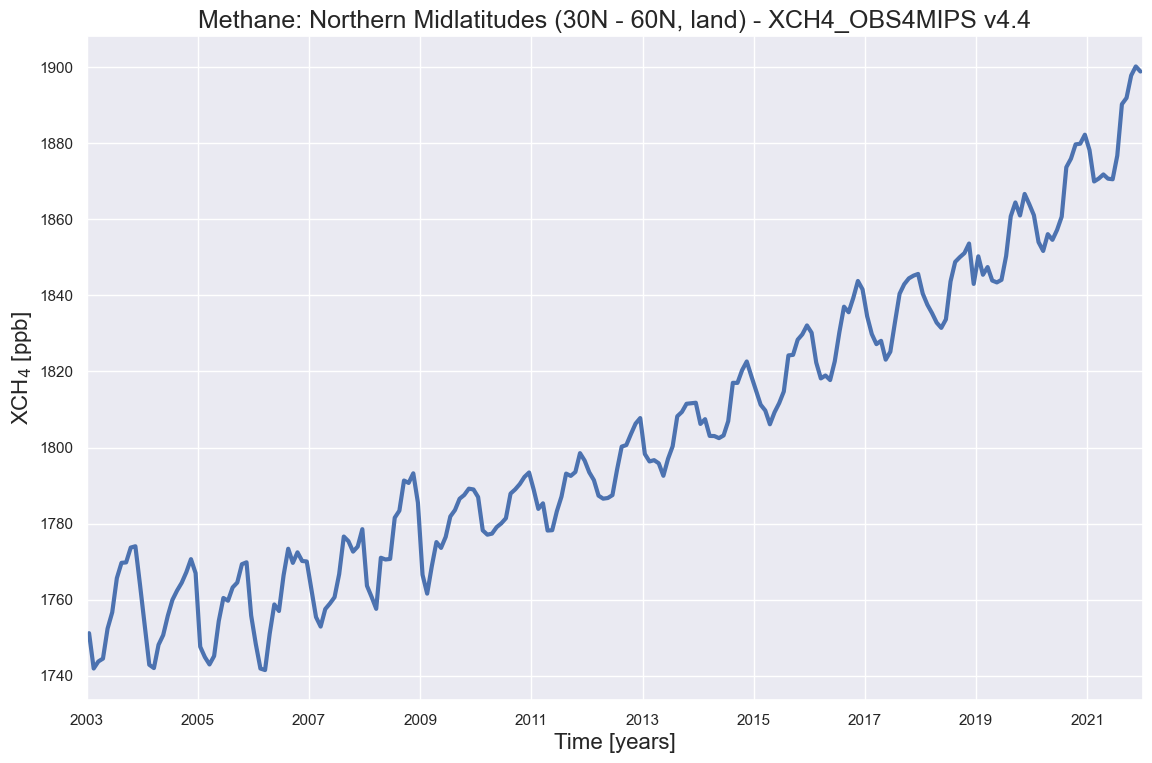

In [7]:
# Compute time series:
#
# Select latitude band etc.:
#lat_min = -90.0; lat_max = 90.0; min_land_fraction = 0.95; lat_str = 'Global (90S - 90N, land)'
lat_min = 30.0; lat_max = 60.0; min_land_fraction = 0.95; ts_str = 'Northern Midlatitudes (30N - 60N, land)'
#
if ((1 == 1) & (read_o4m_file_OK == 1)):
   n_times = len(year)
   ts_year  = []
   ts_month = []
   ts_xghg  = []
   #n_times = 145 # test
   #n_times = 2   # test
   n_cnt = 0
   ts_ok = 1 # Assume time series OK
   for ii in range(n_times):
      idx_time  = ii
      act_year  = year[ii]
      act_month = month[ii]
      #print('* ii act_year act_month: ', ii, act_year, act_month)
      xghg_act  = xghg[ii, :, :] # (36, 72); xghg.shape = (228, 36, 72)
      idx_lat   = np.where((lat >= lat_min) & (lat <= lat_max))
      xghg_tmp1 = xghg_act[idx_lat, :]
      lf_tmp1   = land_fraction[idx_lat, :]
      idx_good  = np.where((xghg_tmp1 < missing_val) & (lf_tmp1 >= min_land_fraction))
      #idx_good  = np.where((xghg_tmp1 < missing_val))
      #len_idx_good = len(idx_good)
      #print('* len_idx_good: ', len_idx_good)
      if (np.any(idx_good)):
         xghg_tmp2 = xghg_tmp1[idx_good]
         xghg_median = np.median(xghg_tmp2)
         ts_year.append(act_year)
         ts_month.append(act_month)
         ts_xghg.append(xghg_median)
         n_cnt = n_cnt + 1
   if n_cnt > 0:
      if 1 == 1:
         ts_year  = np.array(ts_year)
         ts_month = np.array(ts_month)
         ts_xghg  = np.array(ts_xghg)
         ts_fyear = ts_year + (ts_month-0.5)/12.0 # time in fractional years (approx.)
   else:
      print('* ERROR computing time series: No data found !')
      ts_ok = 0

   # Plot time series
   if 1 == 1:
      if ts_ok == 1:
         xxx = ts_fyear
         yyy = ts_xghg
         x_min   = np.min(ts_year)
         x_max   = np.max(ts_year)+1
         x_ticks = x_max - x_min
         if 1 == 1:
            #figsize = (8,5)
            figsize = (12,8)
            fig = plt.figure(figsize=figsize)
            pos = [0.10,0.11,0.88,0.83]     # pos (l,b,w,h) in page coord
            ax  = fig.add_axes(pos)
         else:
            fig, ax = plt.subplots()
         ax.plot(xxx, yyy, linewidth=3.0)
         ax.set(xlim=(x_min, x_max), xticks=np.arange(x_min, x_max, 2))
         title = xghg_str+': '+ts_str+' - '+product_ver
         x_label = 'Time [years]'
         y_label = xghg_str1+' ['+xghg_unit+']'
         plt.title(title, fontsize=18); plt.xlabel(x_label, fontsize=16); plt.ylabel(y_label, fontsize=16)
         if plot_type == 'png':
            o_file_plot = main_product+'_OBS4MIPS_timeseries.png'
            print('* generating: ', o_file_plot)
            plt.savefig(o_file_plot, dpi=600)
         else:
            plt.show()

What does this time series tells us?: As can be seen, XCH4 has a strong seasonal cycle with a maximum in the second half of each year over northern hemispheric mid-latitudes. This is mainly due to natural sources such as wetlands, where CH4 emissions are largest when temperatures are high. As can also be seen, XCH4 was (apart from seasonal fluctuations) relatively constant until about 2006. Since 2007 methane is increasing (increasing again as methane was also increasing for several decades until the late 1990th). Additional information on these satellite-derived XCH4 and XCO2 time series can be found in the Copernicus press release from January 2023, where these data sets have been used: "Copernicus: 2022 was a year of climate extremes, with record high temperatures and rising concentrations of greenhouse gases", see https://climate.copernicus.eu/copernicus-2022-was-year-climate-extremes-record-high-temperatures-and-rising-concentrations. Please have to look at that website to get additional information about the evolution of atmospheric CO2 and XCH using these satellite observations including links to relevant scientific publications.

# Application 2: Investigating spatial variations and coverage

Here the user can chose time (year and month) and spatial domain to generate plots of the spatial distribution of the selected GHG. 

* generating:  XCH4_OBS4MIPS_cmap.png


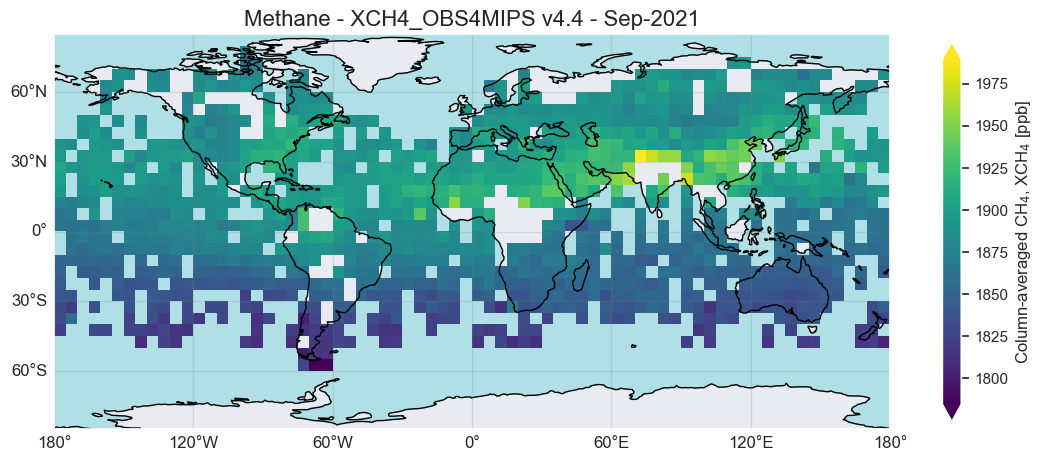

In [8]:
# Generate map and plot it using imshow
if ((1 == 1) & (read_o4m_file_OK == 1)):
   # Select year and month:
   #wanted_year  = 2004
   wanted_year  = 2021
   #wanted_month = 1;    wanted_month_str = 'Jan'
   wanted_month = 9;    wanted_month_str = 'Sep'
   #
   wanted_year_str = str(wanted_year)
   title = xghg_str+' - '+product_ver+' - '+wanted_month_str+'-'+wanted_year_str
   
   min_land_fraction = 0.0
   
   xghg_unc_OK = 0
   title_unc = 'Uncertainty - '+product_ver+' - '+wanted_month_str+'-'+wanted_year_str
   
   if 1 == 1:
      lonmin = -179.0
      lonmax =  179.0
      latmin =  -85.0
      latmax =   85.0
   else:
      lonmin = -30.0
      lonmax =  80.0
      latmin =  10.0
      latmax =  70.0
   
   # Get time index:
   idx_time = np.where((year == wanted_year) & (month == wanted_month))
   len_idx_time = len(idx_time)
   #
   # If OK, then proceed:
   if len_idx_time == 1:
      # Get global map for selected year and month;
      idx_time0 = idx_time[0][0]
      map_xghg_all     = xghg[idx_time0, :, :] 
      map_xghg_unc_all = xghg_unc[idx_time0, :, :] 
      # Reduce to selected region:
      if 1 == 1:
         idx_lat = np.where((lat >= latmin) & (lat <= latmax))
         idx_lon = np.where((lon >= lonmin) & (lon <= lonmax))
         lat_red  = lat[idx_lat]
         lon_red  = lon[idx_lon]
         xghg_red     = map_xghg_all[idx_lat[0][0]:idx_lat[0][-1]+1, idx_lon[0][0]:idx_lon[0][-1]+1]
         xghg_unc_red = map_xghg_unc_all[idx_lat[0][0]:idx_lat[0][-1]+1, idx_lon[0][0]:idx_lon[0][-1]+1]
      idx_good = np.where(xghg_red < missing_val)
      # --------------------------
      # XGHG:
      tmp1 = xghg_red[idx_good]
      xghg_median = int(np.median(tmp1))
      xghg_std    = int(np.std(tmp1))
      rcen = xghg_median
      rmin = rcen - 4*xghg_std
      rmax = rcen + 4*xghg_std
      idx_bad  = np.where(xghg_red > missing_val)
      xghg_red[idx_bad] = np.nan # fill missing values with NaNs
      # --------------------------
      # XGHG uncertainty:
      tmp2 = xghg_unc_red[idx_good]
      xghg_unc_median = int(np.median(tmp2))
      rmin_unc = 0
      rmax_unc = 2*xghg_unc_median
      xghg_unc_red[idx_bad] = np.nan # fill missing values with NaNs
      xghg_unc_OK = 1
      # --------------------------
      # --------------------------------------
      projection = ccrs.PlateCarree()
      if 1 == 1:
         figsize = (11,5)
         fig = plt.figure(figsize=figsize)
         pos = [0.08,0.02,0.95,0.95]     # pos (l,b,w,h) in page coord
         ax1  = fig.add_axes(pos, projection=projection)
         #ax1 = fig.add_subplot(1,1,1, projection=projection) # 'GeoAxesSubplot' object
         #ax1.set_position(pos=pos)
         ax1.coastlines(color='black')
         ax1.add_feature(cfeature.OCEAN, color='powderblue')
         if 1 == 1:
            drawmeridians_label = True
            gl = ax1.gridlines(crs=projection, draw_labels=drawmeridians_label, linewidth=1, color='gray', alpha=0.2)
            #gl.xlabels_top = False
            gl.top_labels   = False
            gl.right_labels = False
         levels = np.linspace(rmin, rmax, 100, endpoint=False)
         lat1 = lat_red
         lon1 = lon_red
         dat1 = xghg_red
         if 1 == 1:
            # Expand region (cell center coords -> cell edge coords):
            dd = (lat1[1] - lat1[0]) * 0.5
            lomi = lon1.min() - dd
            loma = lon1.max() + dd
            lami = lat1.min() - dd
            lama = lat1.max() + dd
            dat1_trans = np.flipud(dat1)
            im=plt.imshow(dat1_trans, cmap=plt.cm.viridis, extent=[lomi, loma, lami, lama])
         else:
            im = ax1.contourf(lon1, lat1, dat1, levels=levels, transform=projection, cmap='viridis', extend='both')
         plt.title(title, fontsize=16)
      # --------------------------------------
      do_cb = 1
      if do_cb == 1:
         #cbar = plt.colorbar(im, extend='both', location='bottom', shrink=0.4)
         cbar = plt.colorbar(im, extend='both', location='right', shrink=0.8)
         #cbar = plt.colorbar(im, ax=ax)
         #cbar.set_label('# of contacts', rotation=270)
         cbar.set_label(xghg_str2)
      if 1 == 1:
         #plot_type = 'screen'
         if plot_type == 'png':
            o_file_plot = main_product+'_OBS4MIPS_cmap.png'
            print('* generating: ', o_file_plot)
            plt.savefig(o_file_plot, dpi=600)
         else:
            plt.show()
   else:
      print('* ERROR: Cannot plot map: issue related to idx_time')

As can be seen, the spatial variation is typically small. The largest difference is often the interhemisheric difference, i.e., the concentration difference between the two hemispheres. Nevertheless, strong source regions may be visible via locally enhanced concentrations.

Here a second maps is generated to see the corresponding (1-sigma) uncertainty of the satellite observations, which is contained for each month and each grid cell in the data product.

* generating:  XCH4_uncertainty_OBS4MIPS_cmap.png


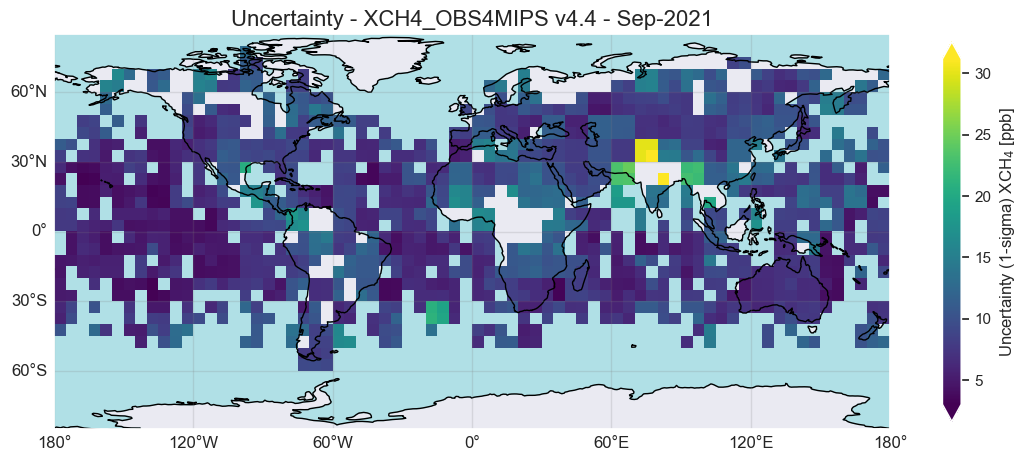

In [9]:
# Plot uncertainty:
if 1 == 1:
   if xghg_unc_OK == 1:
      if 1 == 1:
         #figsize = (11,5)
         fig = plt.figure(figsize=figsize)
         #pos = [0.08,0.02,0.95,0.95]     # pos (l,b,w,h) in page coord
         ax1  = fig.add_axes(pos, projection=projection)
         ax1.coastlines(color='black')
         ax1.add_feature(cfeature.OCEAN, color='powderblue')
         if 1 == 1:
            drawmeridians_label = True
            gl = ax1.gridlines(crs=projection, draw_labels=drawmeridians_label, linewidth=1, color='gray', alpha=0.2)
            gl.top_labels   = False
            gl.right_labels = False
         levels = np.linspace(rmin_unc, rmax_unc, 100, endpoint=False)
         dat1_unc = xghg_unc_red
         if 1 == 1:
            dat1_unc_trans = np.flipud(dat1_unc)
            im=plt.imshow(dat1_unc_trans, cmap=plt.cm.viridis, extent=[lomi, loma, lami, lama])
         plt.title(title_unc, fontsize=16)
      # --------------------------------------
      do_cb = 1
      if do_cb == 1:
         cbar = plt.colorbar(im, extend='both', location='right', shrink=0.8)
         cbar.set_label('Uncertainty (1-sigma) '+xghg_str1+' ['+xghg_unit+']')
      if 1 == 1:
         #plot_type = 'screen'
         if plot_type == 'png':
            o_file_plot_unc = main_product+'_uncertainty_OBS4MIPS_cmap.png'
            print('* generating: ', o_file_plot_unc)
            plt.savefig(o_file_plot_unc, dpi=600)
         else:
            plt.show()

As can be seen, the uncertainty is similar for most regions. For XCH4 the uncertainty is typically on the order of 10 ppb, but may be as large a 20 or 30 ppb for some regions. These are mostly regions with sparse coverage (e.g. due to clouds) and/or a poorly reflecting surface.